In [1]:
#connect to https://pro.coinmarketcap.com/account and copy the python script

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '199b33e0-ad1e-4b95-8c11-23e10e72e1ed',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2024-06-28T18:11:55.307Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 10136}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11335, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [65]:
import pandas as pd

pd.set_option('display.max.columns', None)

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971814e+07,1.971814e+07,False,NaN,1,NaN,NaN,None,2024-06-28T18:10:00.000Z,60736.501600,2.342472e+10,4.3488,-0.077337,-1.692593,-4.626514,-9.922446,-3.462994,-13.204303,1.197611e+12,53.1671,1.275467e+12,None,2024-06-28T18:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:12:01.500624
1,1027,Ethereum,ETH,ethereum,9107,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201827e+08,1.201827e+08,True,NaN,2,NaN,NaN,None,2024-06-28T18:09:00.000Z,3381.872354,1.258456e+10,0.3475,-0.162405,-2.162409,-2.696161,-9.981735,6.669237,-4.166917,4.064426e+11,18.0479,4.064426e+11,None,2024-06-28T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:12:01.500624
2,825,Tether USDt,USDT,tether,90368,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.128078e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-06-28T18:09:00.000Z,0.998399,4.757349e+10,2.0533,0.028335,-0.054311,-0.068959,-0.078387,-0.140634,-0.230596,1.126272e+11,5.0012,1.158910e+11,None,2024-06-28T18:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-28 20:12:01.500624
3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475833e+08,1.475833e+08,False,NaN,4,NaN,NaN,None,2024-06-28T18:09:00.000Z,570.083161,1.589052e+09,-6.3229,-0.231395,-1.671725,-2.070727,-4.177148,-3.594084,-6.305425,8.413476e+10,3.7360,8.413476e+10,None,2024-06-28T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:12:01.500624
4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.623469e+08,5.790736e+08,True,NaN,5,NaN,NaN,None,2024-06-28T18:09:00.000Z,141.108455,2.387234e+09,-12.2753,-0.922670,-4.716437,9.347726,-17.018945,4.879240,-28.334882,6.524106e+10,2.8970,8.171219e+10,None,2024-06-28T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:12:01.500624
5,3408,USDC,USDC,usd-coin,20441,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.242806e+10,3.242806e+10,False,NaN,6,NaN,NaN,None,2024-06-28T18:09:00.000Z,0.999920,5.610636e+09,4.5724,-0.007213,0.003696,-0.001891,-0.018596,-0.009979,-0.026073,3.242547e+10,1.4398,3.242547e+10,None,2024-06-28T18:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-28 20:12:01.500624
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-06-28T18:10:00.000Z,0.470472,9.008027e+08,6.1776,-0.535909,-0.589720,-1.993854,-10.529886,-8.517205,-25.534147,2.619981e+10,1.1634,4.704722e+10,None,2024-06-28T18:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:12:01.500624
7,11419,Toncoin,TON,toncoin,443,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.459675e+09,5.108231e+09,True,NaN,8,3.414167e+09,2.558542e+10,None,2024-06-28T18:09:00.000Z,7.493899,2.291252e+08,-11.2425,-0.310387,-3.164959,6.084257,15.667783,42.489117,41.260668,1.843256e+10,0.8185,3.828056e+10,None,2024-06-28T18:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:12:01.500624
8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-excha

In [45]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '199b33e0-ad1e-4b95-8c11-23e10e72e1ed',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\LENOVO\Documents\Data Analyst\Python\Pandas\Api.csv'):
        df.to_csv(r'C:\Users\LENOVO\Documents\Data Analyst\Python\Pandas\Api.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\LENOVO\Documents\Data Analyst\Python\Pandas\Api.csv',mode='a', header=False)

In [51]:
import os
from time import time
from time import sleep

for i in range(333): #it's our max in a day
    api_runner()
    print('Api runner completed ')
    sleep(60) #sleep for 1 minute
exit()

Api runner completed 
Api runner completed 
Api runner completed 
Api runner completed 
Api runner completed 


KeyboardInterrupt: 

In [69]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19718137.00000,19718137.00000,False,NaN,1,NaN,NaN,None,2024-06-28T18:48:00.000Z,60707.65562,23555205341.68945,5.29660,-0.12320,-1.70843,-5.11360,-9.94468,-3.24665,-13.27589,1197041870428.93066,53.12710,1274860767982.66992,None,2024-06-28T18:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:49:08.035369
1,1027,Ethereum,ETH,ethereum,9107,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120182706.05267,120182706.05267,True,NaN,2,NaN,NaN,None,2024-06-28T18:47:00.000Z,3379.80740,12604270325.45420,0.84800,-0.17020,-2.25081,-3.33669,-10.00933,6.81264,-4.21452,406194398783.56927,18.02710,406194398783.57001,None,2024-06-28T18:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:49:08.035369
2,825,Tether USDt,USDT,tether,90369,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112807784426.23680,116076856624.83345,True,NaN,3,NaN,NaN,None,2024-06-28T18:47:00.000Z,0.99844,47732422223.67186,2.43550,0.03088,-0.03812,-0.07461,-0.05810,-0.13296,-0.22231,112632276764.21382,4.99870,115896262902.28999,None,2024-06-28T18:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-28 20:49:08.035369
3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583312.10726,147583312.10726,False,NaN,4,NaN,NaN,None,2024-06-28T18:47:00.000Z,570.78495,1589988254.43069,-6.68690,-0.05948,-1.70794,-2.23621,-4.02805,-3.25254,-6.41541,84238333105.78719,3.73850,84238333105.78999,None,2024-06-28T18:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:49:08.035369
4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462346760.56298,579073482.96001,True,NaN,5,NaN,NaN,None,2024-06-28T18:47:00.000Z,141.58340,2385961656.64687,-13.41870,0.09140,-4.77598,8.16125,-16.67405,5.68277,-27.92322,65460626146.80495,2.90520,81987192325.99001,None,2024-06-28T18:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:49:08.035369
5,3408,USDC,USDC,usd-coin,20443,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32406863662.79549,32406863662.79549,False,NaN,6,NaN,NaN,None,2024-06-28T18:47:00.000Z,0.99993,5607887982.67782,4.10010,0.00770,0.00699,-0.01870,-0.00406,-0.00150,-0.00461,32404610467.75074,1.43810,32404610467.75000,None,2024-06-28T18:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-28 20:49:08.035369
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55688327582.00000,99987490594.00000,False,NaN,7,NaN,NaN,None,2024-06-28T18:48:00.000Z,0.47312,914650072.71758,7.46250,0.25419,-0.18002,-1.81906,-9.90720,-8.11882,-25.06772,26347064851.05022,1.16930,47311646793.94000,None,2024-06-28T18:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:49:08.035369
7,11419,Toncoin,TON,toncoin,443,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2459675701.00703,5108231123.28509,True,NaN,8,3414166606.00000,25591487928.46652,None,2024-06-28T18:47:00.000Z,7.49568,225935161.75885,-13.85410,-0.14186,-3.54181,5.48468,15.35856,43.08967,40.92692,18436933013.06448,0.81820,38289647288.34000,None,2024-

In [53]:
df72 = pd.read_csv(r'C:\Users\LENOVO\Documents\Data Analyst\Python\Pandas\Api.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.971814e+07,1.971814e+07,False,NaN,1,NaN,NaN,NaN,2024-06-28T18:41:00.000Z,60718.642663,2.355962e+10,5.1284,-0.095311,-1.782662,-4.942431,-9.810192,-3.322302,-13.234223,1.197259e+12,53.1267,1.275091e+12,NaN,2024-06-28T18:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:42:10.754715
1,1,1027,Ethereum,ETH,ethereum,9107,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201827e+08,1.201827e+08,True,NaN,2,NaN,NaN,NaN,2024-06-28T18:40:00.000Z,3381.287423,1.261355e+10,0.8225,-0.049280,-2.289482,-3.194616,-9.898011,6.864345,-4.202768,4.063723e+11,18.0379,4.063723e+11,NaN,2024-06-28T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:42:10.754715
2,2,825,Tether USDt,USDT,tether,90369,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.128078e+11,1.160769e+11,True,NaN,3,NaN,NaN,NaN,2024-06-28T18:40:00.000Z,0.998365,4.774850e+10,2.4316,0.006565,-0.055071,-0.085520,-0.066157,-0.142908,-0.239852,1.126233e+11,4.9991,1.158870e+11,NaN,2024-06-28T18:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-28 20:42:10.754715
3,3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475833e+08,1.475833e+08,False,NaN,4,NaN,NaN,NaN,2024-06-28T18:40:00.000Z,571.139973,1.590044e+09,-6.5862,-0.017301,-1.786779,-2.129007,-3.906552,-3.175458,-6.311059,8.429073e+10,3.7415,8.429073e+10,NaN,2024-06-28T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:42:10.754715
4,4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.623468e+08,5.790735e+08,True,NaN,5,NaN,NaN,NaN,2024-06-28T18:40:00.000Z,141.779606,2.389015e+09,-13.0579,-0.148128,-4.958630,8.611770,-16.515043,5.849188,-27.845793,6.555134e+10,2.9097,8.210081e+10,NaN,2024-06-28T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:42:10.754715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,10,5805,Avalanche,AVAX,avalanche,750,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.0,3.938911e+08,4.432375e+08,False,NaN,11,NaN,NaN,NaN,2024-06-28T18:47:00.000Z,28.061839,3.285859e+08,-13.6162,-0.375139,-0.608737,2.831369,-23.470597,-19.518770,-47.810685,1.105331e+10,0.4906,2.008523e+10,NaN,2024-06-28T18:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:49:08.035369
161,11,1958,TRON,TRX,tron,996,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.720773e+10,8.720774e+10,True,NaN,12,7.165966e+10,8.840749e+09,NaN,2024-06-28T18:47:00.000Z,0.123371,2.233414e+08,-4.2703,0.127527,0.823607,4.479654,9.911378,3.680825,1.311285,1.075894e+10,0.4775,1.075894e+10,NaN,2024-06-28T18:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:49:08.035369
162,12,5994,Shiba Inu,SHIB,shiba-inu,840,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.892712e+14,5.895197e+14,False,NaN,13,NaN,NaN,NaN,2024-06-28T18:47:00.000Z,0.000017,2.641738e+08,17.8261,-0.177462,-2.972665,-3.864940,-38.715873,-27.695420,-43.569794,1.003307e+10,0.4453,1.003730e+10,NaN,2024-06-28T18:47:00.000Z,1027.0,E

In [59]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [67]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19718137.00000,19718137.00000,False,NaN,1,NaN,NaN,NaN,2024-06-28T18:41:00.000Z,60718.64266,23559617942.94631,5.12840,-0.09531,-1.78266,-4.94243,-9.81019,-3.32230,-13.23422,1197258514487.28442,53.12670,1275091495927.47998,NaN,2024-06-28T18:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:42:10.754715
1,1,1027,Ethereum,ETH,ethereum,9107,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120182706.05267,120182706.05267,True,NaN,2,NaN,NaN,NaN,2024-06-28T18:40:00.000Z,3381.28742,12613548181.88770,0.82250,-0.04928,-2.28948,-3.19462,-9.89801,6.86434,-4.20277,406372272467.13562,18.03790,406372272467.14001,NaN,2024-06-28T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:42:10.754715
2,2,825,Tether USDt,USDT,tether,90369,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112807784426.23680,116076856624.83344,True,NaN,3,NaN,NaN,NaN,2024-06-28T18:40:00.000Z,0.99836,47748499864.95493,2.43160,0.00657,-0.05507,-0.08552,-0.06616,-0.14291,-0.23985,112623290985.20676,4.99910,115887016723.17000,NaN,2024-06-28T18:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-28 20:42:10.754715
3,3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147583312.10726,147583312.10726,False,NaN,4,NaN,NaN,NaN,2024-06-28T18:40:00.000Z,571.13997,1590043948.42221,-6.58620,-0.01730,-1.78678,-2.12901,-3.90655,-3.17546,-6.31106,84290728939.36290,3.74150,84290728939.36000,NaN,2024-06-28T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:42:10.754715
4,4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,462346760.56298,579073482.96001,True,NaN,5,NaN,NaN,NaN,2024-06-28T18:40:00.000Z,141.77961,2389015411.52970,-13.05790,-0.14813,-4.95863,8.61177,-16.51504,5.84919,-27.84579,65551341409.94733,2.90970,82100810086.22000,NaN,2024-06-28T18:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:42:10.754715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,10,5805,Avalanche,AVAX,avalanche,750,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,393891118.13797,443237488.13797,False,NaN,11,NaN,NaN,NaN,2024-06-28T18:47:00.000Z,28.06184,328585877.54898,-13.61620,-0.37514,-0.60874,2.83137,-23.47060,-19.51877,-47.81068,11053309330.78314,0.49060,20085225662.41000,NaN,2024-06-28T18:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:49:08.035369
161,11,1958,TRON,TRX,tron,996,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,87207729424.70497,87207742919.25377,True,NaN,12,71659659264.00000,8840749173.72820,NaN,2024-06-28T18:47:00.000Z,0.12337,223341358.18080,-4.27030,0.12753,0.82361,4.47965,9.91138,3.68083,1.31128,10758935637.88538,0.47750,10758937302.73000,NaN,2024-06-28T18:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-28 20:49:08.035369
162,12,5994,Shiba Inu,SHIB,shiba-inu,840,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589271235892739.87500,589519685236088.87500,False,NaN,13,NaN,NaN,NaN,2024-06-28T18:47:00.000Z,0.

In [109]:
df3 = df72.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.10374,-1.72237,-5.00752,-9.83665,-3.30498,-13.24436
Ethereum,-0.07233,-2.24811,-3.24537,-9.93336,6.85359,-4.21131
Tether USDt,0.01246,-0.04848,-0.07979,-0.06479,-0.14176,-0.23342
BNB,-0.00872,-1.75377,-2.16908,-3.94720,-3.19538,-6.34985
Solana,-0.01976,-4.87655,8.47257,-16.56304,5.80829,-27.87983
USDC,0.00468,0.01158,-0.00463,-0.00550,0.00199,-0.00695
XRP,0.26140,-0.21288,-1.74620,-9.84008,-8.06787,-25.02896
Toncoin,-0.20845,-3.46552,5.62548,15.54310,43.16100,41.26140
Dogecoin,-0.05678,-1.07193,-0.03344,-25.16577,-12.09612,-38.61045


In [111]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.10374
           quote.USD.percent_change_24h    -1.72237
           quote.USD.percent_change_7d     -5.00752
           quote.USD.percent_change_30d    -9.83665
           quote.USD.percent_change_60d    -3.30498
                                             ...   
Chainlink  quote.USD.percent_change_24h    -1.62307
           quote.USD.percent_change_7d      0.39938
           quote.USD.percent_change_30d   -24.18574
           quote.USD.percent_change_60d     1.94998
           quote.USD.percent_change_90d   -26.28624
Length: 90, dtype: float64

In [105]:
type(df4)

pandas.core.series.Series

In [113]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.10374
          quote.USD.percent_change_24h  -1.72237
          quote.USD.percent_change_7d   -5.00752
          quote.USD.percent_change_30d  -9.83665
          quote.USD.percent_change_60d  -3.30498
...                                          ...
Chainlink quote.USD.percent_change_24h  -1.62307
          quote.USD.percent_change_7d    0.39938
          quote.USD.percent_change_30d -24.18574
          quote.USD.percent_change_60d   1.94998
          quote.USD.percent_change_90d -26.28624

[90 rows x 1 columns]

In [91]:
type(df5)
df5.count()

values    90
dtype: int64

In [117]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10374
1,Bitcoin,quote.USD.percent_change_24h,-1.72237
2,Bitcoin,quote.USD.percent_change_7d,-5.00752
3,Bitcoin,quote.USD.percent_change_30d,-9.83665
4,Bitcoin,quote.USD.percent_change_60d,-3.30498
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,-1.62307
86,Chainlink,quote.USD.percent_change_7d,0.39938
87,Chainlink,quote.USD.percent_change_30d,-24.18574
88,Chainlink,quote.USD.percent_change_60d,1.94998


In [119]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10374
1,Bitcoin,quote.USD.percent_change_24h,-1.72237
2,Bitcoin,quote.USD.percent_change_7d,-5.00752
3,Bitcoin,quote.USD.percent_change_30d,-9.83665
4,Bitcoin,quote.USD.percent_change_60d,-3.30498
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,-1.62307
86,Chainlink,quote.USD.percent_change_7d,0.39938
87,Chainlink,quote.USD.percent_change_30d,-24.18574
88,Chainlink,quote.USD.percent_change_60d,1.94998


In [129]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.10374
1,Bitcoin,24h,-1.72237
2,Bitcoin,7d,-5.00752
3,Bitcoin,30d,-9.83665
4,Bitcoin,60d,-3.30498
...,...,...,...
85,Chainlink,24h,-1.62307
86,Chainlink,7d,0.39938
87,Chainlink,30d,-24.18574
88,Chainlink,60d,1.94998


In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

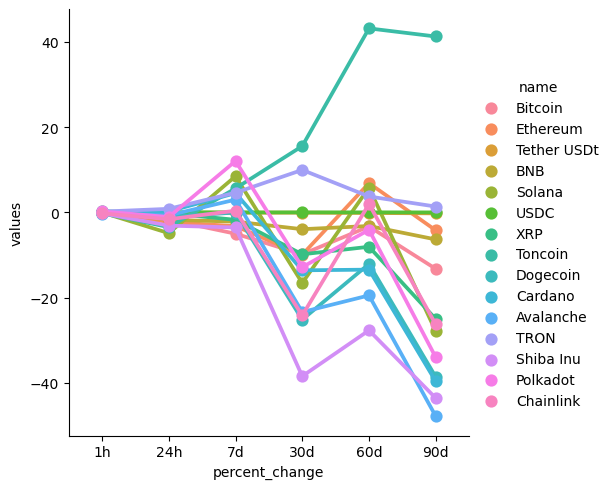

In [131]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [147]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df72[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,60718.64266,2024-06-28 20:42:10.754715
15,Bitcoin,60718.64266,2024-06-28 20:42:21.379115
30,Bitcoin,60718.64266,2024-06-28 20:42:31.987786
45,Bitcoin,60718.64266,2024-06-28 20:42:42.651299
60,Bitcoin,60718.64266,2024-06-28 20:42:53.255422
75,Bitcoin,60718.64266,2024-06-28 20:43:03.875204
90,Bitcoin,60723.87136,2024-06-28 20:45:05.631520
105,Bitcoin,60712.57196,2024-06-28 20:46:06.269570
120,Bitcoin,60719.31023,2024-06-28 20:47:06.858511
135,Bitcoin,60720.91378,2024-06-28 20:48:07.440786


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

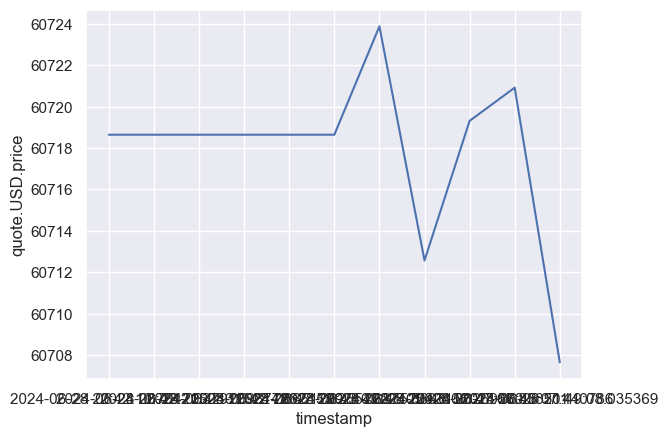

In [157]:
sns.set_theme(style="darkgrid")
pd.option_context('mode.use_inf_as_na', True)
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)